In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
print(f"Train: {train.shape} | Test: {test.shape}")

Train: (1460, 81) | Test: (1459, 80)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for df in [train, test]:
    # numéricas → mediana
    df.fillna(df.select_dtypes(include=np.number).median(), inplace=True)
    # categóricas → 'Missing'
    df.fillna('Missing', inplace=True)

print("Missing values tratados → nulos:", train.isnull().sum().sum())

Missing values tratados → nulos: 0


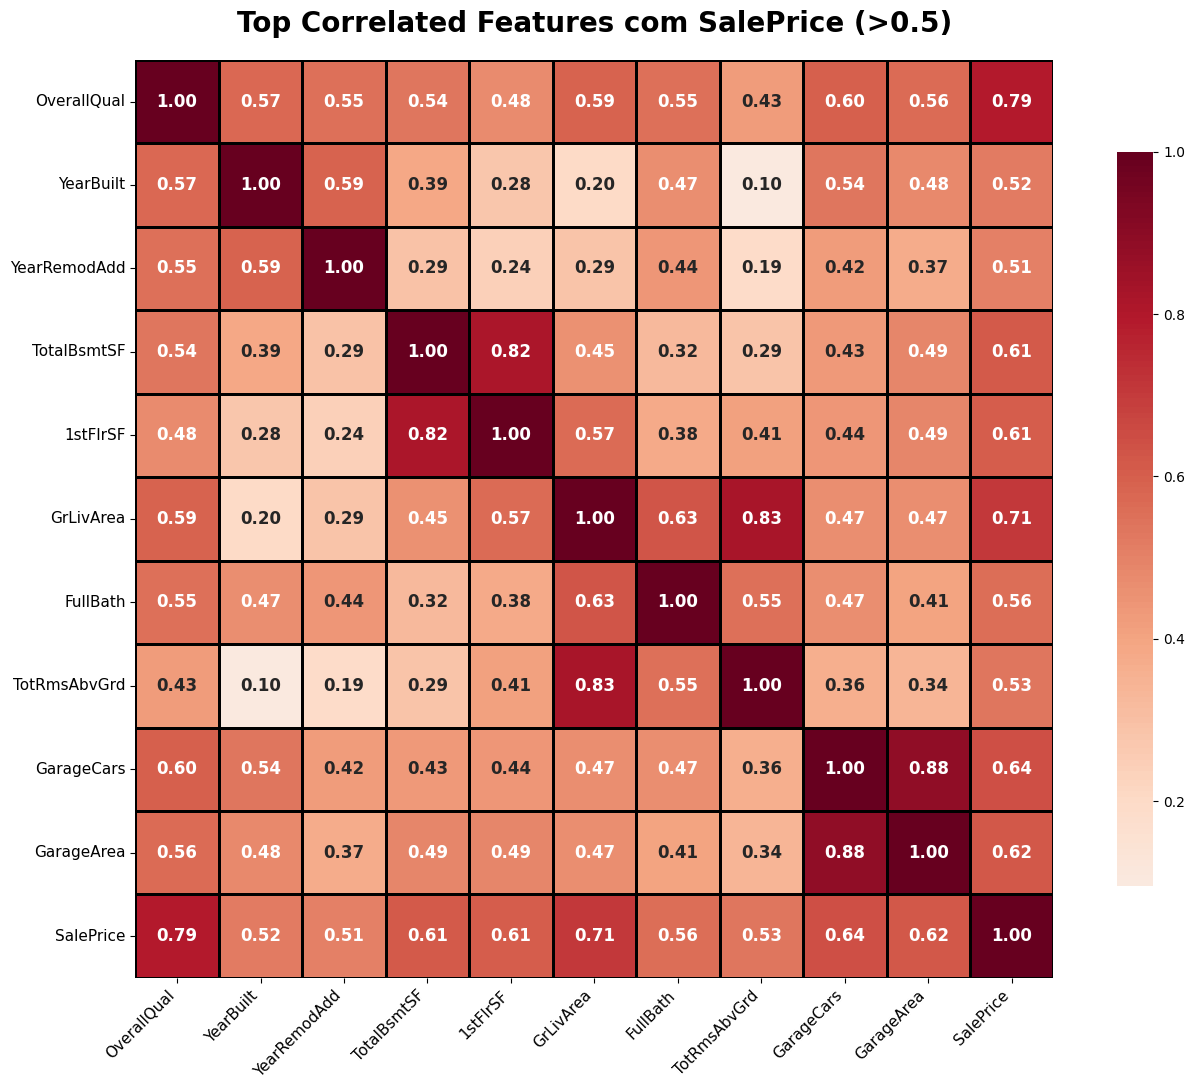

In [5]:
numeric_cols = train.select_dtypes(include='number')
corr = numeric_cols.corr()
top_corr = corr.index[abs(corr["SalePrice"]) > 0.5].tolist()

plt.figure(figsize=(14, 11))
sns.heatmap(
    train[top_corr].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",          # ← essa é a mágica: vermelho-azul (profissional)
    center=0,               # zero no meio (branco)
    linewidths=1,
    linecolor='black',
    cbar_kws={"shrink": .8},
    square=True,
    annot_kws={"size": 12, "weight": "bold"}
)
plt.title('Top Correlated Features com SalePrice (>0.5)', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [6]:
numeric_cols = train.select_dtypes(include='number')
for df in [train, test]:
    df['TotalArea'] = df['1stFlrSF'] + df['2ndFlrSF']
    df['HouseAge']  = df['YrSold'] - df['YearBuilt']
    df['TotalQual'] = df['OverallQual'] * df['GrLivArea']      # multiplicação!
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
    df['TotalB']    = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] +  + 0.5*df['BsmtHalfBath']

print("Features criadas!")

Features criadas!


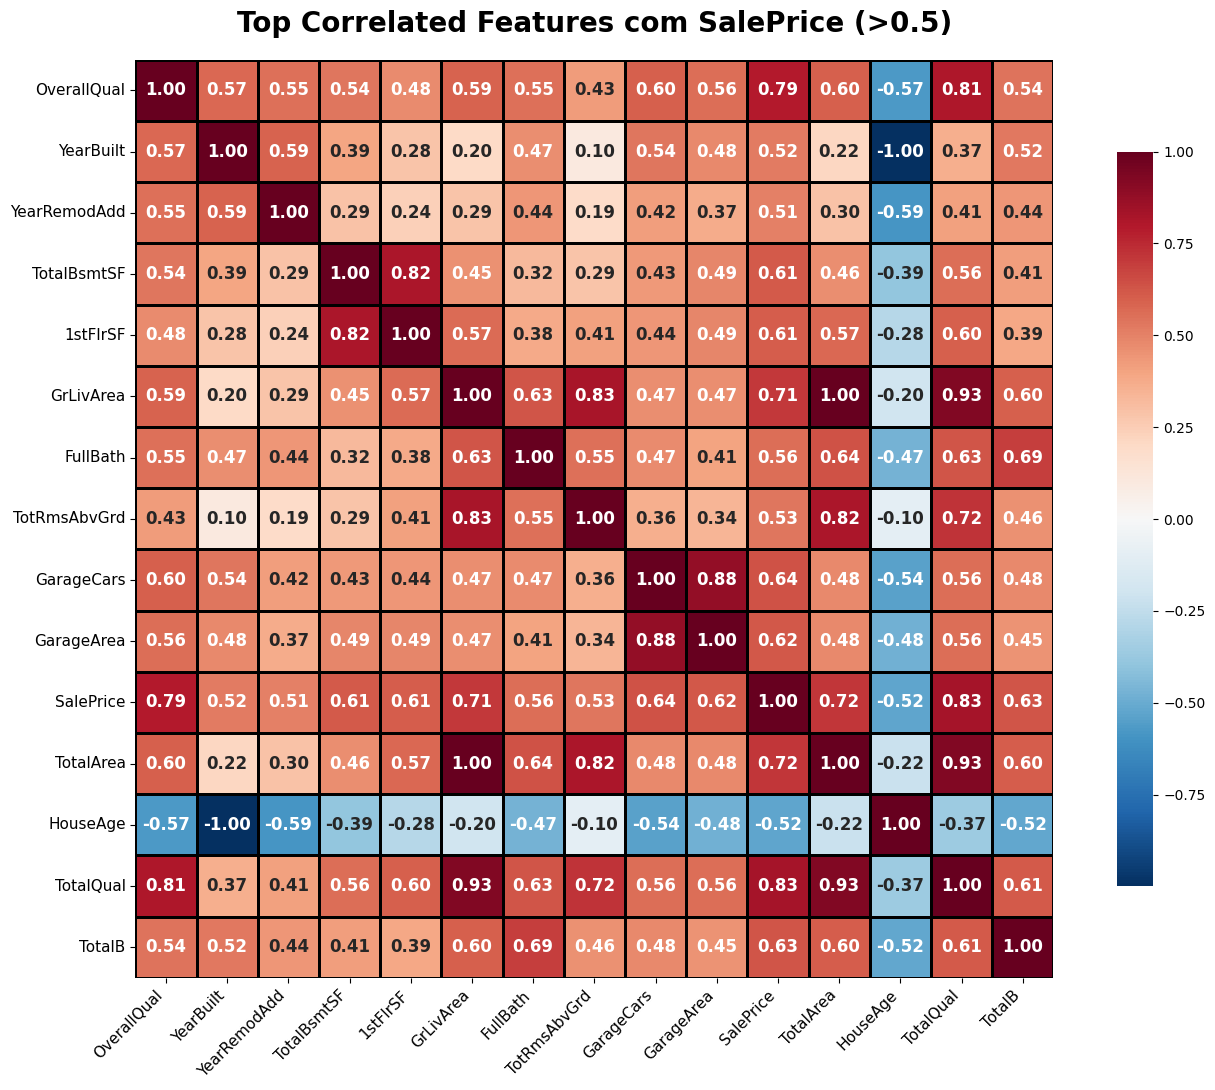

In [7]:
numeric_cols = train.select_dtypes(include='number')
corr = numeric_cols.corr()
top_corr = corr.index[abs(corr["SalePrice"]) > 0.5].tolist()

plt.figure(figsize=(14, 11))
sns.heatmap(
    train[top_corr].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",          # ← essa é a mágica: vermelho-azul (profissional)
    center=0,               # zero no meio (branco)
    linewidths=1,
    linecolor='black',
    cbar_kws={"shrink": .8},
    square=True,
    annot_kws={"size": 12, "weight": "bold"}
)
plt.title('Top Correlated Features com SalePrice (>0.5)', fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

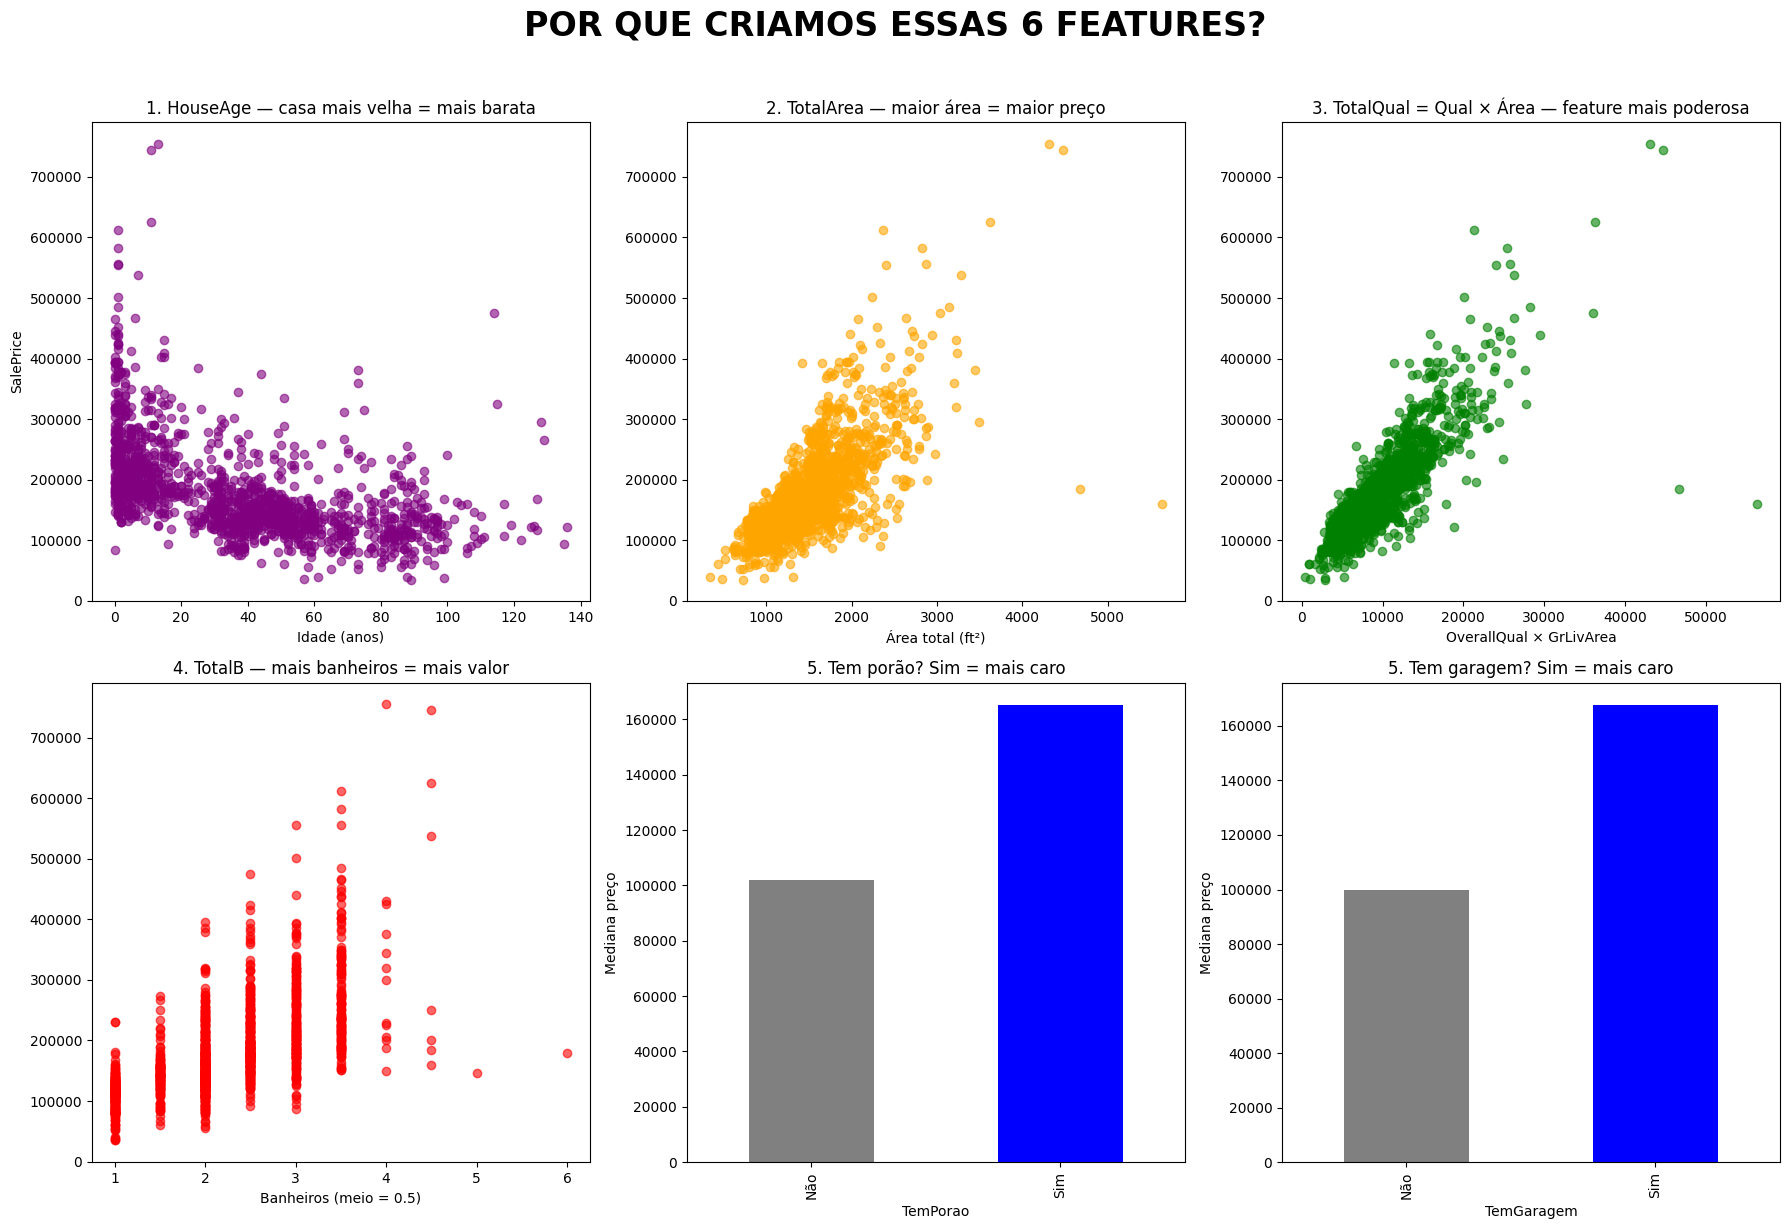

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("POR QUE CRIAMOS ESSAS 6 FEATURES?", fontsize=24, fontweight='bold', y=1.02)

# 1. Idade
axes[0,0].scatter(train['HouseAge'], train['SalePrice'], alpha=0.6, c='purple')
axes[0,0].set(title='1. HouseAge — casa mais velha = mais barata', xlabel='Idade (anos)', ylabel='SalePrice')

# 2. Área total
axes[0,1].scatter(train['TotalArea'], train['SalePrice'], alpha=0.6, c='orange')
axes[0,1].set(title='2. TotalArea — maior área = maior preço', xlabel='Área total (ft²)')

# 3. Qualidade × Área (a mais forte do dataset!)
axes[0,2].scatter(train['TotalQual'], train['SalePrice'], alpha=0.6, c='green')
axes[0,2].set(title='3. TotalQual = Qual × Área — feature mais poderosa', xlabel='OverallQual × GrLivArea')

# 4. Banheiros ponderados
axes[1,0].scatter(train['TotalB'], train['SalePrice'], alpha=0.6, c='red')
axes[1,0].set(title='4. TotalB — mais banheiros = mais valor', xlabel='Banheiros (meio = 0.5)')

# 5. Tem porão?
train['TemPorao'] = (train['TotalBsmtSF'] > 0).astype(int)
train.groupby('TemPorao')['SalePrice'].median().plot(kind='bar', ax=axes[1,1], color=['gray','blue'])
axes[1,1].set(title='5. Tem porão? Sim = mais caro', xticklabels=['Não','Sim'], ylabel='Mediana preço')

# 5. Tem porão?
train['TemGaragem'] = (train['GarageCars'] > 0).astype(int)
train.groupby('TemGaragem')['SalePrice'].median().plot(kind='bar', ax=axes[1,2], color=['gray','blue'])
axes[1,2].set(title='5. Tem garagem? Sim = mais caro', xticklabels=['Não','Sim'], ylabel='Mediana preço')


plt.tight_layout()
plt.show()

In [9]:
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
X_test  = test.drop('Id', axis=1)

# One-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(f"Shapes finais → Train: {X_train.shape} | Test: {X_test.shape}")

# Modelo (mesmo que te deu 0.13977 antes)
rf = RandomForestRegressor(n_estimators=1000, random_state=50, n_jobs=-1)
rf.fit(X_train, y_train)
print("Modelo treinado!")

# Previsão
pred = rf.predict(X_test)

# Submission
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})
submission.to_csv('submission.csv', index=False)


Shapes finais → Train: (1460, 267) | Test: (1459, 267)
Modelo treinado!
